# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Abenojar, Joshua\
_Student No._: 2019-08669\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: March 5, 2024

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Joshua M. Abenojar

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [2]:
import numpy as np
data = np.load('spec4000_corrected.npz') # load the file

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [3]:
data.files 

['spec_recons', 'wavelength']

In [12]:
print(np.shape(data['spec_recons']))
print(np.shape(data['wavelength']))
## Here, the spec recons are composed of 4000 readings on 1000 different wavelengths

(4000, 1000)
(1000,)


Let's plot the first few spectra to visualize our data

Text(0.5, 1.0, 'Sample SDSS spectra')

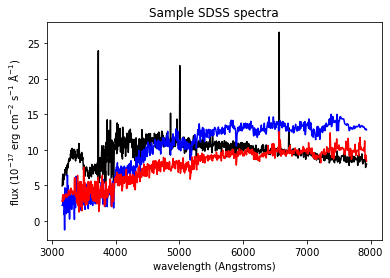

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

# This shows the first three out of 4000 readings on different wavelengths

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


[[0.01561043 0.01639127 0.01926835 ... 0.02382536 0.02528862 0.02533262]
 [0.00670018 0.00669275 0.00668538 ... 0.03928702 0.03958566 0.03920573]
 [0.01120987 0.01118265 0.0137535  ... 0.03793933 0.03719647 0.03424204]
 ...
 [0.00876578 0.01004222 0.01106105 ... 0.02363358 0.03494343 0.0286802 ]
 [0.00819846 0.00924495 0.01032879 ... 0.03921879 0.03613767 0.03775293]
 [0.00986118 0.01037061 0.01260019 ... 0.03539928 0.04028117 0.03950021]]


Text(0.5, 1.0, 'Sample SDSS spectra')

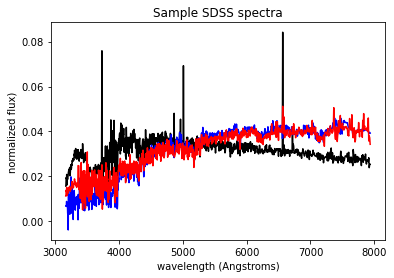

In [7]:
from sklearn.preprocessing import normalize

data_norm=normalize(data['spec_recons'],axis=1) #normalization of the flux along different wavelengths
print(data_norm)
fluxn0 = data_norm[0,:]
fluxn1 = data_norm[1,:]
fluxn2 = data_norm[2,:]

plt.plot(wavelength, fluxn0, 'k-')
plt.plot(wavelength, fluxn1, 'b-')
plt.plot(wavelength, fluxn2, 'r-')
plt.ylabel("normalized flux)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")
# This part shows the normalized flux of the first 3 out of 4000 spectra readings

Shape of mean, Shape of stdev=(1000,) (1000,)


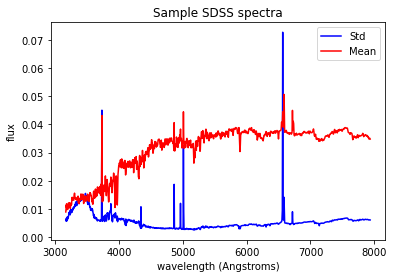

In [20]:
data_ave=np.mean(data_norm,axis=0) # Mean of normalized flux across different wavelengths
data_std=np.std(data_norm,axis=0) #Standard deviation of normalized flux across different wavelengths

#plt.plot(wavelength, fluxn0, 'k-',label="flux 1")
plt.plot(wavelength, data_std, 'b-',label="Std") # mean vs wavelength plot
plt.plot(wavelength, data_ave, 'r-', label="Mean") #standard deviation vs wavelength plot
plt.ylabel("flux")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")
plt.legend()
print(f"Shape of mean, Shape of stdev={np.shape(data_ave)} {np.shape(data_std)}") # This line verifies that the mean was done on the right axis(if it wasnt the shape would be (4000,))
#This part shows the means and standard deviations from 4000 normalized data across 1000 wavelengths  

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4) #Indicate number of principal components
X_pca=pca.fit_transform(data_norm) #Fits the normalized data to the pca
np.shape(X_pca) # I used it to verify
print(f'Shape before PCA:{np.shape(data_norm)}')
print(f'Shape after PCA:{np.shape(X_pca)}')
# Before PCA should be a 4000x1000 matrix because it is the original data
# After PCA should be a 4000x4 matrix because it is the result of a multiplication of a 4000x1000(Original) matrix and a 1000x4(Eigenvectors) matrix.

Shape before PCA:(4000, 1000)
Shape after PCA:(4000, 4)


2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

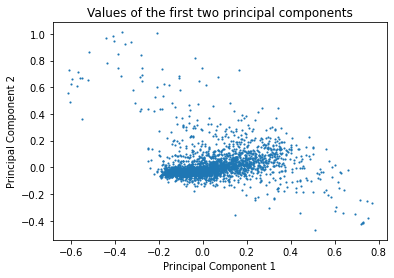

In [18]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.',s=5) # PC 1 vs PC2 plot
plt.title('Values of the first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

Eigenvalues:[0.02173596 0.01195034 0.00503923 0.00339751]
Eigenvector shape:(4, 1000)
Eigenvector shape:(1000,)


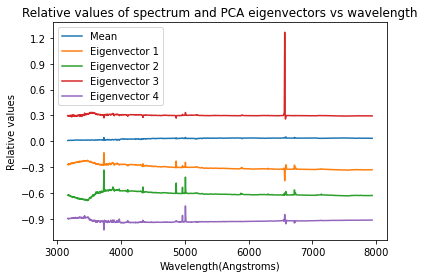

In [11]:
eigenvalues = pca.explained_variance_ # This gives us the four highest eigenvalues from the covariance matrix
eigenvectors=pca.components_ # This gives us the corresponding four eigenvectors of the four highest eigenvalues from the covariance matrix
# Give them all their separate variables
EV1=eigenvectors[0]
EV2=eigenvectors[1]
EV3=eigenvectors[2]
EV4=eigenvectors[3]
print(f'Eigenvalues:{eigenvalues}')
print(f'Eigenvector shape:{np.shape(pca.components_)}')#since the eigenvectors should be composed of 4 1x1000 matrices, I used this to check if I got the right result
print(f'Eigenvector shape:{np.shape(EV1)}')


fig = plt.figure()
offset=0.3 # Offset to separate the 5 plots
ax = plt.axes()
ax.plot(wavelength,data_ave, label="Mean")
ax.plot(wavelength,EV1-1*offset*np.ones(1000), label="Eigenvector 1")
ax.plot(wavelength,EV2-2*offset*np.ones(1000), label="Eigenvector 2")
ax.plot(wavelength,EV3+1*offset*np.ones(1000), label="Eigenvector 3")
ax.plot(wavelength,EV4-3*offset*np.ones(1000), label="Eigenvector 4")
ax.set_yticks(np.linspace(-3*offset,4*offset,8))
ax.set_xlabel('Wavelength(Angstroms)')
ax.set_ylabel('Relative values')
ax.set_title('Relative values of spectrum and PCA eigenvectors vs wavelength')
ax.legend()

To summarize, we started with a 4000 x 1000 matrix which represents 4000 spectrum readings across 1000 different wavelengths. We treated each wavelength as a different feature.
sklearn automatically computes the principal components by giving the number of wanted components and the normalized matrix but theoretically, it computes the covariance matrix$$\begin{pmatrix}\sigma_{1,1}& \sigma_{1,2}& \sigma_{1,3}&\sigma_{1,4}&\ldots&\sigma_{1,1000}\\\sigma_{2,1}& \sigma_{2,2}& \sigma_{2,3}&\sigma_{2,4}&\ldots&\sigma_{2,1000}\\\sigma_{3,1}& \sigma_{3,2}& \sigma_{3,3}&\sigma_{3,4}&\ldots&\sigma_{3,1000}\\ \vdots&\vdots&\vdots&\vdots\\ \sigma_{1000,1}& \sigma_{1000,2}& \sigma_{1000,3}&\sigma_{1000,4} &\ldots&\sigma_{1000,1000}\end{pmatrix}$$, gets the highest four eigenvalues($\lambda_1, \lambda_2, \lambda_3, \lambda_4$), and computes their corresponding eigenvectors $$\begin{pmatrix}a_{1,1}& a_{1,2}& a_{1,3}&a_{1,4}\\a_{2,1}& a_{2,2}& a_{2,3}&a_{2,4}\\a_{3,1}& a_{3,2}& a_{3,3}&a_{3,4}\\ \vdots&\vdots&\vdots&\vdots\\ a_{1000,1}& a_{1000,2}& a_{1000,3}&a_{1000,4} \end{pmatrix}$$
However, these all can be automated using the commands:
`pca.fit_transform(data_norm)`,`pca.explained_variance_`,`pca.components_`

## References
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

https://numpy.org/doc/stable/reference/generated/numpy.mean.html

https://www.jcchouinard.com/pca-with-python/

https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca